<a href="https://colab.research.google.com/github/Leena-GO/Self-study/blob/main/%5Cfoundation_of_mathematics_with_python%5C1)%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9D%B4%EB%9E%80%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
D1 = np.array([[1,1.2,3,4,5,6],[1.5,3,2.3,5.3,3.8,5.5]])
D2 = np.array([[-0.6,1,1.2,3,4,5,6],[2.9,1.5,3,2.3,5.3,3.8,5.5]])

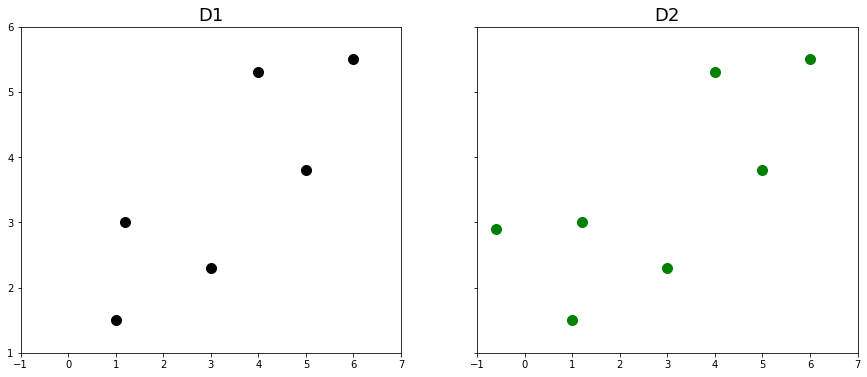

In [13]:
fig, (ax1,ax2) = plt.subplots(1,2, sharex = True, sharey = True)
fig.set_size_inches((15, 6))

ax1.plot(D1[0], D1[1], 'ko',markersize = 10) #ko: black dots
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.set_title('D1', fontsize = 18)

ax2.plot(D2[0], D2[1], 'go', markersize = 10) #go: green dots
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.set_title('D2', fontsize = 18)

plt.show()

In [20]:
def machine_learning(D):
  N = D.shape[1] # 데이터의 개수 할당
  X = np.c_[np.ones(N), D[0]]
  y = D[1]

  w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T,y))
  return w

In [19]:
# 참고: 처음 보는 'np.c_[]'에 대하여!
# Stack 1D arrays as columns into a 2D array.
a = np.array([1,2,3])
b = np.array([4,5,6])

print(a)
print(b)
print('-'*8)
print(np.c_[a,b])

[1 2 3]
[4 5 6]
--------
[[1 4]
 [2 5]
 [3 6]]


In [21]:
# 참고: 처음 보는 'np.linalg.solve()'에 대하여!
# Solve a linear matrix equation

a = np.array([[4,3],[3,2]])
b = np.array([23,16])

x = np.linalg.solve(a,b)
x

array([2., 5.])

In [22]:
np.allclose(np.dot(a,x), b)

True

- 바로 위에 나온 예시는, 

  **4·χ₁+ 3·χ₂= 23**

  **3·χ₁+2·χ₂= 16**

  의 연립방정식 해를 구하는 코드이다.

In [29]:
def more_clever(D): # 두 점을 지나는 직선 구하기
  first, last = D[:,0], D[:,-1]
  w1 = (last[1] - first[1]) / (last[0]-first[0])
  w0 = -w1 * first[0] + first[1]
  return(w0,w1)

def f(x,w):
  return w[1] * x + w[0]

In [30]:
w_ml_d1 = machine_learning(D1)
w_mc_d1 = more_clever(D1)

w_ml_d2 = machine_learning(D2)
w_mc_d2 = more_clever(D2)

x = np.linspace(-1, 7, 100)

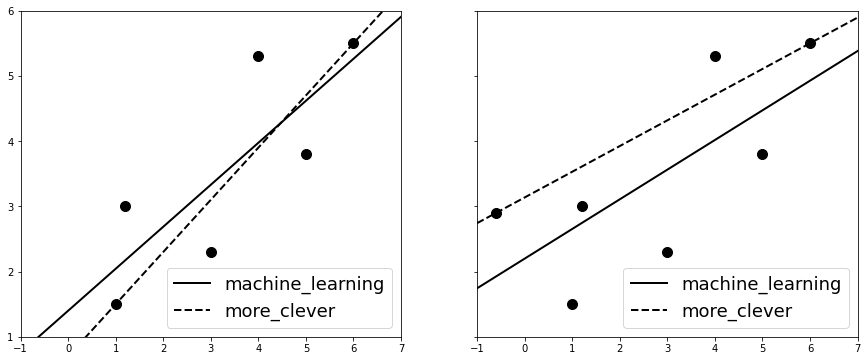

In [33]:
fig, (ax1,ax2) = plt.subplots(1, 2, sharex = True, sharey = True)
fig.set_size_inches((15,6))

ax1.plot(D1[0], D1[1], 'ko', markersize = 10)
ax1.plot(x, f(x, w_ml_d1), c = 'k', lw = 2, label = 'machine_learning')
ax1.plot(x, f(x, w_mc_d1), '--', c = 'k', lw = 2, label = 'more_clever')
ax1.set_xlim([-1,7])
ax1.set_ylim([1,6])
ax1.legend(fontsize = 18)

ax2.plot(D2[0],D2[1], 'ko', markersize = 10)
ax2.plot(x, f(x, w_ml_d2), c = 'k', lw = 2, label = 'machine_learning')
ax2.plot(x, f(x,w_mc_d2), '--', c = 'k', lw = 2, label = 'more_clever')
ax2.set_xlim([-1,7])
ax2.set_ylim([1,6])
ax2.legend(fontsize = 18)

plt.show()